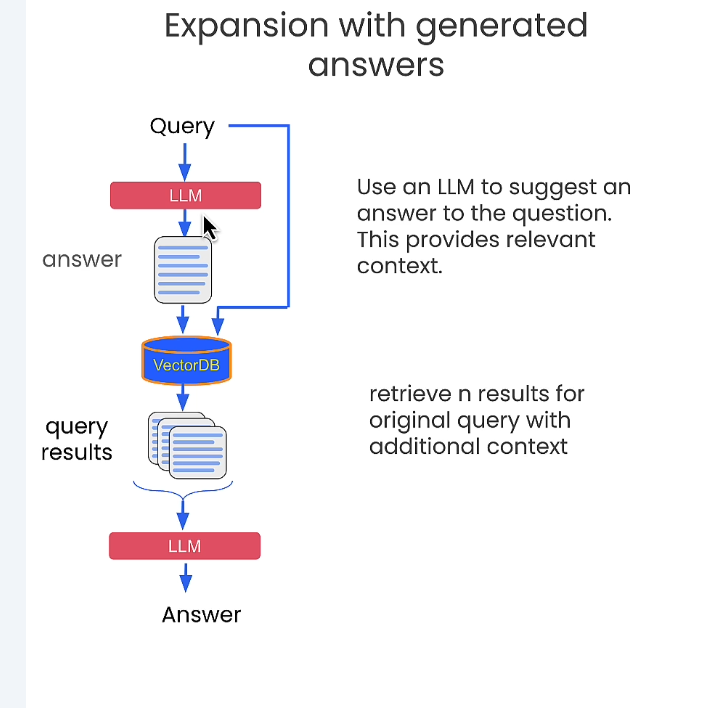

In [1]:
from helper_utils import load_chroma, word_wrap, project_embeddings
from chromadb.utils.embedding_functions import SentenceTransformerEmbeddingFunction

In [2]:
embedding_function = SentenceTransformerEmbeddingFunction()

chroma_collection = load_chroma(filename='microsoft_annual_report_2022.pdf', collection_name='microsoft_annual_report_2022', embedding_function=embedding_function)
chroma_collection.count()

2025-03-25 00:39:58.471380: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1742841598.587395   72600 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1742841598.622839   72600 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1742841598.843457   72600 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742841598.843501   72600 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1742841598.843503   72600 computation_placer.cc:177] computation placer alr

349

In [3]:
# import umap

# embeddings = chroma_collection.get(include=['embeddings'])['embeddings']
# umap_transform = umap.UMAP(random_state=0, transform_seed=0).fit(embeddings)
# projected_dataset_embeddings = project_embeddings(embeddings, umap_transform)

In [4]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
import os
from dotenv import load_dotenv

In [5]:
load_dotenv()
api_key = os.getenv("GROQ_API_KEY")

In [6]:
template = ChatPromptTemplate([
    ("system", "You are a helpful expert financial research assistant. Provide an example answer to the given question, that might be found in a document like an annual report. "),
    ("human", "{user_input}"),
])

In [7]:
llm = ChatGroq(
                api_key=api_key,
                model_name="llama3-70b-8192",
                temperature=0.2,  # Lower temperature for more consistent medical responses
                max_tokens=2048    # Ensure sufficient tokens for detailed answers
            )
output_parser = StrOutputParser()
chain = template|llm|output_parser

In [8]:
original_query = "Was there significant turnover in the executive team?"
hypothetical_answer = chain.invoke(original_query)

joint_query = f"{original_query} {hypothetical_answer}"
print(word_wrap(joint_query))

Was there significant turnover in the executive team? **Executive Team
Turnover**

During the fiscal year ended December 31, 2022, our company
experienced some changes in its executive leadership team. While we
strive to maintain stability and continuity in our leadership, we
recognize that occasional changes can bring fresh perspectives and new
ideas to drive our business forward.

In the past year, we had two
changes in our executive team:

1. **Chief Operating Officer (COO):**
Our former COO, John Smith, departed the company in April 2022 to
pursue another opportunity. We appreciate John's contributions to our
growth and success during his tenure. In June 2022, we appointed Jane
Doe as our new COO, who brings over 15 years of experience in
operations management and a proven track record of driving efficiency
and productivity.
2. **Chief Financial Officer (CFO):** Our CFO,
Michael Johnson, announced his retirement in October 2022, after
serving the company for over a decade. We thank

In [9]:
results = chroma_collection.query(query_texts=joint_query, n_results=5, include=['documents', 'embeddings'])
retrieved_documents = results['documents'][0]

for doc in retrieved_documents:
    print(word_wrap(doc))
    print('')

30 management ’ s discussion and analysis of financial condition and
results of operations the following management ’ s discussion and
analysis of financial condition and results of operations ( “ md & a ”
) is intended to help the reader understand the results of operations
and financial condition of microsoft corporation. md & a is provided as
a supplement to, and should be read in conjunction with, our
consolidated financial statements and the accompanying notes to
financial statements in our fiscal year 2022 form 10 - k. this section
generally discusses the results of our operations for the year ended
june 30, 2022 compared to the year ended june 30, 2021. for a
discussion of the year ended june 30, 2021 compared to the year ended
june 30, 2020, please refer to in our fiscal year 2022 form 10 - k, “
management ’ s discussion and analysis of financial condition and
results of operations ” in our annual report on form 10 - k for the
year ended june 30, 2021. overview

officer, fable 

In [10]:
# retrieved_embeddings = results['embeddings'][0]
# original_query_embedding = embedding_function([original_query])
# augmented_query_embedding = embedding_function([joint_query])

# projected_original_query_embedding = project_embeddings(original_query_embedding, umap_transform)
# projected_augmented_query_embedding = project_embeddings(augmented_query_embedding, umap_transform)
# projected_retrieved_embeddings = project_embeddings(retrieved_embeddings, umap_transform)

In [11]:
# import matplotlib.pyplot as plt

# # Plot the projected query and retrieved documents in the embedding space
# plt.figure()
# plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
# plt.scatter(projected_retrieved_embeddings[:, 0], projected_retrieved_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
# plt.scatter(projected_original_query_embedding[:, 0], projected_original_query_embedding[:, 1], s=150, marker='X', color='r')
# plt.scatter(projected_augmented_query_embedding[:, 0], projected_augmented_query_embedding[:, 1], s=150, marker='X', color='orange')

# plt.gca().set_aspect('equal', 'datalim')
# plt.title(f'{original_query}')
# plt.axis('off')

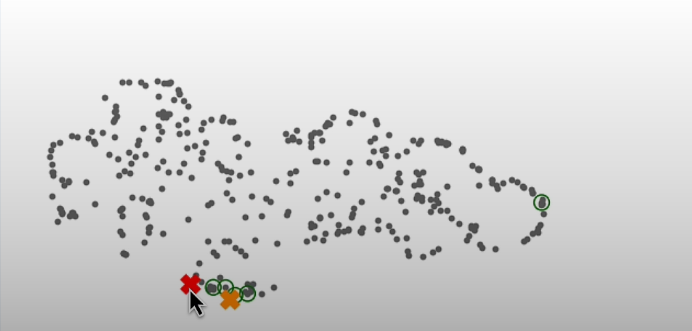

## Expansion with multiple queries


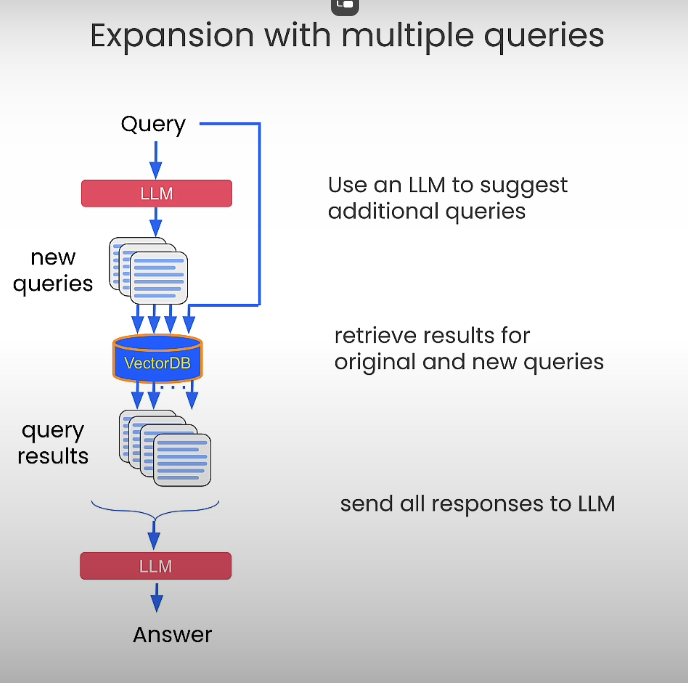

In [17]:
template = ChatPromptTemplate([
    ("system", "You are a helpful expert financial research assistant. Your users are asking questions about an annual report. "
            "Suggest up to five additional related questions to help them find the information they need, for the provided question. "
            "Suggest only short questions without compound sentences. Suggest a variety of questions that cover different aspects of the topic."
            "Make sure they are complete questions, and that they are related to the original question."
            "Output one question per line. Do not number the questions."),
    ("human", "{user_input}"),
])

In [18]:
llm = ChatGroq(
                api_key=api_key,
                model_name="llama3-70b-8192",
                temperature=0.2,  # Lower temperature for more consistent medical responses
                max_tokens=2048    # Ensure sufficient tokens for detailed answers
            )
output_parser = StrOutputParser()
chain = template|llm|output_parser

In [19]:
original_query = "What were the most important factors that contributed to increases in revenue?"
augmented_queries = chain.invoke(original_query)

for query in augmented_queries.split('\n'):
    print(query)

What was the overall revenue growth rate compared to the previous year?
Which product or service segment drove the most revenue growth?
Were there any significant changes in pricing or sales volume?
Did the company make any strategic acquisitions or partnerships that impacted revenue?
Were there any changes in the company's geographic sales mix that contributed to revenue growth?


In [20]:
queries = [original_query] + augmented_queries.split('\n')
results = chroma_collection.query(query_texts=queries, n_results=5, include=['documents', 'embeddings'])

retrieved_documents = results['documents']

# Deduplicate the retrieved documents
unique_documents = set()
for documents in retrieved_documents:
    for document in documents:
        unique_documents.add(document)

for i, documents in enumerate(retrieved_documents):
    print(f"Query: {queries[i]}")
    print('')
    print("Results:")
    for doc in documents:
        print(word_wrap(doc))
        print('')
    print('-'*100)

Query: What were the most important factors that contributed to increases in revenue?

Results:
engineering, gaming, and linkedin. • sales and marketing expenses
increased $ 1. 7 billion or 8 % driven by investments in commercial
sales and linkedin. sales and marketing included a favorable foreign
currency impact of 2 %. • general and administrative expenses increased
$ 793 million or 16 % driven by investments in corporate functions.
operating income increased $ 13. 5 billion or 19 % driven by growth
across each of our segments. current year net income and diluted eps
were positively impacted by the net tax benefit related to the transfer
of intangible properties, which resulted in an increase to net income
and diluted eps of $ 3. 3 billion and $ 0. 44, respectively. prior year
net income and diluted eps were positively impacted by the net tax
benefit related to the india supreme court decision on withholding
taxes, which resulted in an increase to net income and diluted eps of $
620 

In [ ]:
# original_query_embedding = embedding_function([original_query])
# augmented_query_embeddings = embedding_function(augmented_queries)

# project_original_query = project_embeddings(original_query_embedding, umap_transform)
# project_augmented_queries = project_embeddings(augmented_query_embeddings, umap_transform)
# result_embeddings = results['embeddings']
# result_embeddings = [item for sublist in result_embeddings for item in sublist]
# projected_result_embeddings = project_embeddings(result_embeddings, umap_transform)
# import matplotlib.pyplot as plt

# plt.figure()
# plt.scatter(projected_dataset_embeddings[:, 0], projected_dataset_embeddings[:, 1], s=10, color='gray')
# plt.scatter(project_augmented_queries[:, 0], project_augmented_queries[:, 1], s=150, marker='X', color='orange')
# plt.scatter(projected_result_embeddings[:, 0], projected_result_embeddings[:, 1], s=100, facecolors='none', edgecolors='g')
# plt.scatter(project_original_query[:, 0], project_original_query[:, 1], s=150, marker='X', color='r')

# plt.gca().set_aspect('equal', 'datalim')
# plt.title(f'{original_query}')
# plt.axis('off')

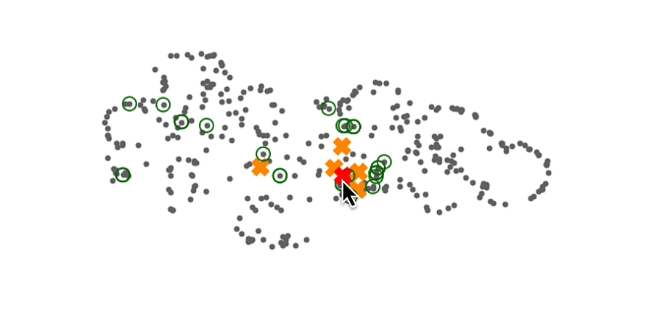